# Estymatory największej wiarygodności

In [88]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from scipy import optimize

# Zadanie 1
Napisz program, który losuje próbkę z rozkładu jednostajnego i rysuje funkcję gęstości rozkładu normalnego z parametrami $\mu=1$, $\sigma=1$. 

In [89]:
N = 100000
u=stats.uniform()
data = u.rvs(size=N)
mu= 0
sigma = 1

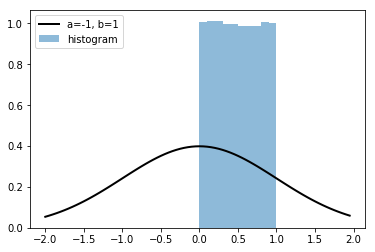

In [90]:
t = np.arange(-2, 2, 0.05)
num_bins = 50
fig, ax = plt.subplots(1, 1)
ax.hist(data, normed=True, histtype='stepfilled', alpha=0.5, label='histogram')
ax.legend(loc='best', frameon=False)
ax.plot(t, stats.norm.pdf(t,mu, sigma), 'k-', lw=2, label='a=-1, b=1')
ax.legend()
plt.show()

# Zadanie 2
Napisz program, który losuje próbkę z rozkładu jednostajnego i rysuje funkcję gęstości rozkładu normalnego z parametrami 

<ul>
<li>$\mu=\frac{1}{n}\sum_{i=1}^n x_i$</li>
<li>$\sigma^2=\frac{1}{n} \sum_{i=1}^n(x_i - \mu)^2$</li>
</ul>

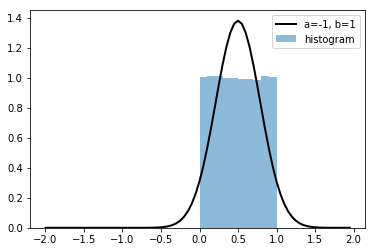

0.4990557806400356
0.2891511631689023


In [91]:
m = (1/N)*np.sum(data)
s = np.sqrt( (1/N)*np.sum( (data - m)**2 ) )

t = np.arange(-2, 2, 0.05)
num_bins = 50
fig, ax = plt.subplots(1, 1)
ax.hist(data, normed=True, histtype='stepfilled', alpha=0.5, label='histogram')
ax.legend(loc='best', frameon=False)
ax.plot(t, stats.norm.pdf(t,m, s), 'k-', lw=2, label='a=-1, b=1')
ax.legend()
plt.show()

print(m)
print(s)

# Zadanie 3
Napisz program, który losuje próbkę z rozkładu jednostajnego i rysuje funkcję gęstości rozkładu normalnego z parametrami otrzymanymi za pomocą funkcji <tt>fit()</tt> ze <tt>scipy.stats</tt>

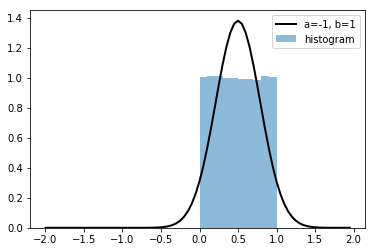

In [92]:
m, s = stats.norm.fit(data)

t = np.arange(-2, 2, 0.05)
num_bins = 50
fig, ax = plt.subplots(1, 1)
ax.hist(data, normed=True, histtype='stepfilled', alpha=0.5, label='histogram')
ax.legend(loc='best', frameon=False)
ax.plot(t, stats.norm.pdf(t, m, s), 'k-', lw=2, label='a=-1, b=1')
ax.legend()
plt.show()

In [93]:
m = (1/N)*np.sum(data)
s = np.sqrt( (1/N)*np.sum( (data - m)**2 ) )

print(m)
print(s)

m, s = stats.norm.fit(data)

print(m)
print(s)

0.4990557806400356
0.2891511631689023
0.49905578064003553
0.2891511631689023


# Zadanie 4

Wiemy, że funkcja wiarygodnosci ma postać:

$$
L(X,m,\sigma)=\prod_{i=1}^n f_{m,\sigma} (x_i).
$$


Zaimplementuj logarytmiczną funkcję wiarygodności  dla rodziny rozkładów normalnych:

$$
l(X,m,\sigma)=\ln\left( L(X,m,\sigma) \right)=\ln\left(\prod_{i=1}^n f_{m,\sigma} (x_i) \right)=\sum_{i=1}^n \ln(f_{m,\sigma} (x_i))
$$

In [94]:
# split normal distribution pdf
def Gpdf(x, mu, sigma):
    return 1/(sigma * (2*np.pi)**.5) *np.e ** (-(x-mu)**2/(2 * sigma**2))

In [95]:
def l( par ):
    mu, sigma = par
    return -np.sum( np.log( Gpdf(data, mu, np.abs(sigma) ) )  )

x0 = np.asarray((1, 1))  # Initial guess.
res1 = optimize.fmin_cg(l, x0)
print(res1)

         Current function value: 17813.286154
         Iterations: 9
         Function evaluations: 272
         Gradient evaluations: 65
[0.49905577 0.28915116]


# Zadanie 5
Policz MLE dla danych z rozkładu jednostajnego i parametrów:
<ul>
<li>$\mu=0$, $\sigma=1$</li>
<li>$\mu=0$, $\sigma=2$</li>
<li>$\mu=1$, $\sigma=1$</li>
<li>$\mu=0.5$, $\sigma=0.2$</li>
</ul>
Dla których wartości wychodzi wynik największy i dlaczego?

In [96]:
print( l((0,1)) )
print( l((0,2)) )
print( l((1,1)) )
print( l((0.5,0.2)) )

108527.10668807548
165366.88471836387
108621.52862407194
35461.67046721833


# Zadanie 6
Zapoznaj się z funkcją <tt>optimize.fmin_cg</tt>
https://docs.scipy.org/doc/scipy-0.19.0/reference/generated/scipy.optimize.fmin_cg.html
i znajdż minimum funkcji

$$
f(x,y) = (x+1)^2+y^2
$$

In [97]:
def f(x):
    x1, x2 = x
    return (x1+1)**2+(x2)**2
x0 = np.asarray((0, 0))  # Initial guess.
res1 = optimize.fmin_cg(f, x0)
print(res1)

         Current function value: 0.000100
         Iterations: 1
         Function evaluations: 20
         Gradient evaluations: 2
[-1.01000000e+00 -7.52508635e-09]


# Zadanie 7
Zminimalizuj funkcją wiarygodności z Zad. 5 (numerycznie).

Czy wyniki są podobne do wyniików z poprzednich zadań?

In [98]:
x0 = np.asarray((1, 1))  # Initial guess.
res1 = optimize.fmin_cg(l, x0)
print(res1)

         Current function value: 17813.286154
         Iterations: 9
         Function evaluations: 272
         Gradient evaluations: 65
[0.49905577 0.28915116]


# Zadanie 8 (dla chętnych)
Wykonaj poprzednie zadanie wykorzystując pochodne http://faculty.washington.edu/ezivot/econ583/mleLectures.pdf.

# Zadanie 9
Napisz funkcję gęstości rozkładu Split Gaussian:

$$
SN(x;m,\sigma^2,\tau^2) = \left\{ \begin{array}{ll}
c \cdot \exp[-\frac{1}{2\sigma^2}(x-m)^2], & \textrm{for $x\leq m$},\\
c \cdot \exp[-\frac{1}{2\tau^2\sigma^2}(x-m)^2], & \textrm{for $x>m$},\\
\end{array} \right.
$$

gdzie $c=\sqrt{\frac{2}{\pi}}\sigma^{-1}(1+\tau)^{-1}$.

Narysuj gęstości dla parametrów:

<ul>
<li>$\mu=0$, $\sigma=1$, $\tau=1$</li>
<li>$\mu=0$, $\sigma=1$, $\tau=1/2$</li>
<li>$\mu=1$, $\sigma=1/2$, $\tau=1$</li>
</ul>

In [99]:
def SGpdf(x, mu, sigma, tau):
    c= np.sqrt(2/np.pi)*sigma**(-1.)*(1+tau)**(-1.)
    if( x < mu):
        return c * np.e ** (-(x-mu)**2/(2 * sigma**2))
    else:
        return c * np.e ** (-(x-mu)**2/(2 * sigma**2 * tau**2))
    

# Zadanie 10

Wiemy, że funkcja wiarygodnosci ma postać:

$$
L(X,m,\sigma,\tau)=\prod_{i=1}^n f_{m,\sigma,\tau} (x_i).
$$

Zaimplementuj logarytmiczną funkcję wiarygodności  dla rodziny rozkładów Split Normal:

$$
l(X,m,\sigma,\tau)=\ln\left( L(X,m,\sigma,\tau) \right)=\ln\left(\prod_{i=1}^n f_{m,\sigma,\tau} (x_i) \right)=\sum_{i=1}^n \ln(f_{m,\sigma,\tau} (x_i))
$$

In [100]:
SGpdf_v = np.vectorize(SGpdf)

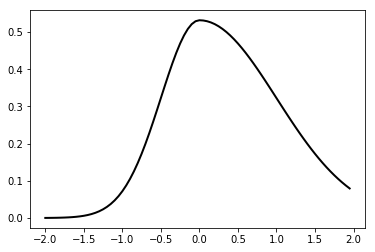

In [101]:
t = np.arange(-2, 2, 0.05)
mu, sigma, tau = (0, 0.5, 2)
plt.plot(t, SGpdf_v(t, mu, sigma, tau), 'k-', lw=2, label='a=-1, b=1')
plt.show()

# Zadanie 11
Zminimalizuj funkcją wiarygodności z Zad. 10 (numerycznie).

In [102]:
N = 1000
u=stats.uniform()
data = u.rvs(size=N)

def ll( par ):
    mu, sigma, tau = par
    return -np.sum( np.log( SGpdf_v(data, mu, np.abs(sigma), np.abs(tau) ) )  )

x0 = np.asarray((0, 1, 1))  # Initial guess.
res2 = optimize.fmin_cg(ll, x0)
print(res2)

         Current function value: 159.094446
         Iterations: 17
         Function evaluations: 682
         Gradient evaluations: 134
[9.99228470e-01 5.61226848e-01 6.16854696e-08]


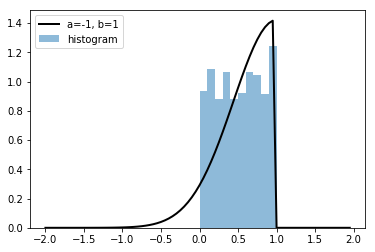

In [103]:
t = np.arange(-2, 2, 0.05)
num_bins = 50
fig, ax = plt.subplots(1, 1)
ax.hist(data, normed=True, histtype='stepfilled', alpha=0.5, label='histogram')
ax.legend(loc='best', frameon=False)
ax.plot(t, SGpdf_v(t, res2[0], res2[1], res2[2]), 'k-', lw=2, label='a=-1, b=1')
#ax.plot(t, stats.norm.pdf(t, m, s), 'r-', lw=2, label='a=-1, b=1')
ax.legend()
plt.show()

# Zadanie 12
Zaimportuj dane <tt>datasets</tt> i wyestymuj rozkład normalny i Split Normal dla <tt>boston.data[:,7]</tt>.

Rozpocznij procedurę minimalizacji od warunku początkowego:

<ul>
<li>mu=np.mean(data)</li>
<li>sigma=np.std(data)</li>
<li>tau=np.std(data)</li>
</ul>

Który rozkład lepiej pasuje do danych?

In [104]:
from sklearn import datasets
boston = datasets.load_boston()
data=boston.data[:,7]

In [105]:
x0 = np.asarray((0, 1, 1))  # Initial guess.
res2 = optimize.fmin_cg(ll, x0)
print(res2)

x0 = np.asarray((1, 1))  # Initial guess.
res1 = optimize.fmin_cg(l, x0)
print(res1)

         Current function value: 986.425485
         Iterations: 37
         Function evaluations: 402
         Gradient evaluations: 78
[ 1.57642114  0.24790114 12.83744304]
         Current function value: 1094.304647
         Iterations: 6
         Function evaluations: 72
         Gradient evaluations: 15
[3.8016406 2.1186486]


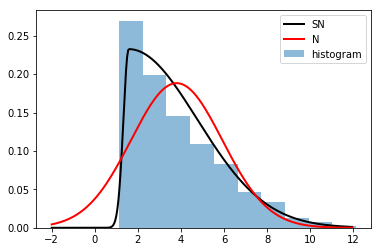

In [113]:
t = np.arange(-2, 12, 0.05)
num_bins = 50
fig, ax = plt.subplots(1, 1)
ax.hist(data, normed=True, histtype='stepfilled', alpha=0.5, label='histogram')
ax.legend(loc='best', frameon=False)
ax.plot(t, SGpdf_v(t, res2[0], res2[1], res2[2]), 'k-', lw=2, label='SN')
#ax.plot(t, Gpdf(t, res1[0], res1[1]), 'r-', lw=2, label='N')
ax.plot(t, stats.norm(res1[0], res1[1]).pdf(t), 'r-', lw=2, label='N')
ax.legend()
plt.show()